# Import Data

In [311]:
import pandas as pd
import numpy as np
import math 
df = pd.read_csv('AggregatedData.csv')
# see the data table
df.loc[0:5]
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH


# Feature Engineering

In [312]:
# checking if there is any null value in any column
for i in range (0 , 12):
    print(df.iloc[:,i].isnull().any() )

False
False
False
False
False
False
False
False
False
False
False
False


In [313]:
#check if there is nan value in numeric features
for i in range (2,8):
    print(np.isnan(df.iloc[:,i]).any())

False
False
False
False
False
False


In [314]:
df["ATM Name"].unique()

array(['Big Street ATM', 'Mount Road ATM', 'Airport ATM', 'KK Nagar ATM',
       'Christ College ATM'], dtype=object)

In [315]:
df.loc[df["ATM Name"] == "Big Street ATM" ].count()

ATM Name                        2354
Transaction Date                2354
No Of Withdrawals               2354
No Of XYZ Card Withdrawals      2354
No Of Other Card Withdrawals    2354
Total amount Withdrawn          2354
Amount withdrawn XYZ Card       2354
Amount withdrawn Other Card     2354
Weekday                         2354
Festival Religion               2354
Working Day                     2354
Holiday Sequence                2354
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


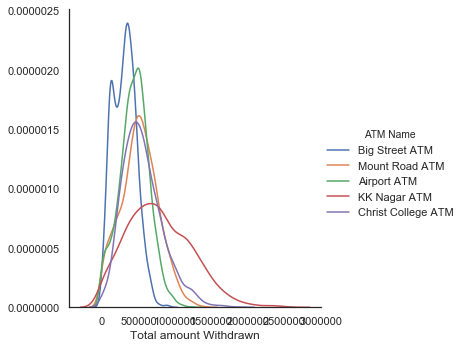

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",color_codes=True)
# plt.plot(df["No Of Withdrawals"])

sns.FacetGrid(df,hue="ATM Name",size=5).map(sns.kdeplot,"Total amount Withdrawn").add_legend()

In [317]:
# select target ATM
df["T_year"] = pd.to_datetime ( df["Transaction Date"] ).apply(lambda x : x.year)
df.loc[(df.where(df["ATM Name"] == "Big Street ATM")["No Of Withdrawals"]).notnull()]

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH,2011
5,Big Street ATM,2/1/2011,17,5,12,52800,20900,31900,Sunday,NH,H,HHW,2011
10,Big Street ATM,3/1/2011,24,21,3,88100,77100,11000,Monday,NH,W,WWW,2011
15,Big Street ATM,4/1/2011,34,12,22,101600,51200,50400,Tuesday,NH,W,WWW,2011
20,Big Street ATM,5/1/2011,30,14,16,98000,52700,45300,Wednesday,NH,W,WWW,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11564,Big Street ATM,25-09-2017,122,41,81,513800,283000,230800,MONDAY,NH,W,HWW,2017
11569,Big Street ATM,26-09-2017,131,36,95,437400,162700,274700,TUESDAY,NH,W,WWW,2017
11574,Big Street ATM,27-09-2017,130,40,90,511200,215000,296200,WEDNESDAY,NH,W,WWW,2017
11579,Big Street ATM,28-09-2017,137,41,96,468600,221800,246800,THURSDAY,NH,W,WWH,2017


In [318]:
#as data is stored in multiple formats in table, so we created these functions
def getMonth(date):
    if "/" in str(date):
        return pd.to_datetime( date , format="%d/%m/%Y" ).month
    else:
        return pd.to_datetime( date , format="%d-%m-%Y").month
    
def getDay(date):
    if "/" in str(date):
        return pd.to_datetime( date , format="%d/%m/%Y" ).day
    else:
        return pd.to_datetime( date , format="%d-%m-%Y").day
    
df["T_month"] = df["Transaction Date"].apply(lambda x:  getMonth(x) )  
df["T_day"] = df["Transaction Date"].apply(lambda x:  getDay(x) )  

#  pd.to_datetime( df["Transaction Date"] , format="%d/%m/%Y" ).apply(lambda x : x.month) 
df.loc[(df.where(df["ATM Name"] == "Big Street ATM")["No Of Withdrawals"]).notnull()]


,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH,2011,1,1
5,Big Street ATM,2/1/2011,17,5,12,52800,20900,31900,Sunday,NH,H,HHW,2011,1,2
10,Big Street ATM,3/1/2011,24,21,3,88100,77100,11000,Monday,NH,W,WWW,2011,1,3
15,Big Street ATM,4/1/2011,34,12,22,101600,51200,50400,Tuesday,NH,W,WWW,2011,1,4
20,Big Street ATM,5/1/2011,30,14,16,98000,52700,45300,Wednesday,NH,W,WWW,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11564,Big Street ATM,25-09-2017,122,41,81,513800,283000,230800,MONDAY,NH,W,HWW,2017,9,25
11569,Big Street ATM,26-09-2017,131,36,95,437400,162700,274700,TUESDAY,NH,W,WWW,2017,9,26
11574,Big Street ATM,27-09-2017,130,40,90,511200,215000,296200,WEDNESDAY,NH,W,WWW,2017,9,27
11579,Big Street ATM,28-09-2017,137,41,96,468600,221800,246800,THURSDAY,NH,W,WWH,2017,9,28


In [319]:
# Now make working days all as capital
df["Weekday"] = df["Weekday"].apply(lambda x: str.upper(x))

# Prediction work starts here

In [320]:
# separate data of Big_Street_ATM

Big_Street_ATM_Data = (df.loc[df.where( (df["ATM Name"] == "Big Street ATM") )["No Of Withdrawals"].notnull()] )
Big_Street_ATM_Data

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,SATURDAY,H,H,WHH,2011,1,1
5,Big Street ATM,2/1/2011,17,5,12,52800,20900,31900,SUNDAY,NH,H,HHW,2011,1,2
10,Big Street ATM,3/1/2011,24,21,3,88100,77100,11000,MONDAY,NH,W,WWW,2011,1,3
15,Big Street ATM,4/1/2011,34,12,22,101600,51200,50400,TUESDAY,NH,W,WWW,2011,1,4
20,Big Street ATM,5/1/2011,30,14,16,98000,52700,45300,WEDNESDAY,NH,W,WWW,2011,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11564,Big Street ATM,25-09-2017,122,41,81,513800,283000,230800,MONDAY,NH,W,HWW,2017,9,25
11569,Big Street ATM,26-09-2017,131,36,95,437400,162700,274700,TUESDAY,NH,W,WWW,2017,9,26
11574,Big Street ATM,27-09-2017,130,40,90,511200,215000,296200,WEDNESDAY,NH,W,WWW,2017,9,27
11579,Big Street ATM,28-09-2017,137,41,96,468600,221800,246800,THURSDAY,NH,W,WWH,2017,9,28


# Data Cleaning of target data

In [321]:
Big_Street_ATM_Data = Big_Street_ATM_Data.drop(columns = ["ATM Name","Transaction Date","No Of XYZ Card Withdrawals","No Of Other Card Withdrawals", "Amount withdrawn XYZ Card", "Amount withdrawn Other Card"])
Big_Street_ATM_Data["Weekday"] = Big_Street_ATM_Data["Weekday"].apply(lambda x: 1 if x == "MONDAY" else ( 2 if  x == "TUESDAY" else ( 3 if x == "WEDNESDAY" else (4 if x== "THURSDAY" else (5 if x == "FRIDAY" else (6 if x == "SATURDAY" else (7 if x== "SUNDAY" else 0))))) ))
Big_Street_ATM_Data

,No Of Withdrawals,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
0,50,123800,6,H,H,WHH,2011,1,1
5,17,52800,7,NH,H,HHW,2011,1,2
10,24,88100,1,NH,W,WWW,2011,1,3
15,34,101600,2,NH,W,WWW,2011,1,4
20,30,98000,3,NH,W,WWW,2011,1,5
...,...,...,...,...,...,...,...,...,...
11564,122,513800,1,NH,W,HWW,2017,9,25
11569,131,437400,2,NH,W,WWW,2017,9,26
11574,130,511200,3,NH,W,WWW,2017,9,27
11579,137,468600,4,NH,W,WWH,2017,9,28


In [322]:
Big_Street_ATM_Data["Festival Religion"].unique()

array(['H', 'NH', 'N', 'M', 'C'], dtype=object)

In [323]:
Big_Street_ATM_Data["Festival Religion"] = Big_Street_ATM_Data["Festival Religion"].apply(lambda x: 1 if x == "H" else ( 2 if x == "NH" else (3 if x== "N" else (4 if x == "M" else (5 if x == "C" else 0)))))
Big_Street_ATM_Data

,No Of Withdrawals,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
0,50,123800,6,1,H,WHH,2011,1,1
5,17,52800,7,2,H,HHW,2011,1,2
10,24,88100,1,2,W,WWW,2011,1,3
15,34,101600,2,2,W,WWW,2011,1,4
20,30,98000,3,2,W,WWW,2011,1,5
...,...,...,...,...,...,...,...,...,...
11564,122,513800,1,2,W,HWW,2017,9,25
11569,131,437400,2,2,W,WWW,2017,9,26
11574,130,511200,3,2,W,WWW,2017,9,27
11579,137,468600,4,2,W,WWH,2017,9,28


In [324]:
Big_Street_ATM_Data["Working Day"] = Big_Street_ATM_Data["Working Day"].apply(lambda x: 1 if x == "H" else (2 if x == "W" else 0))
Big_Street_ATM_Data.head()

,No Of Withdrawals,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
0,50,123800,6,1,1,WHH,2011,1,1
5,17,52800,7,2,1,HHW,2011,1,2
10,24,88100,1,2,2,WWW,2011,1,3
15,34,101600,2,2,2,WWW,2011,1,4
20,30,98000,3,2,2,WWW,2011,1,5


In [325]:
Big_Street_ATM_Data["Holiday Sequence"].unique()

array(['WHH', 'HHW', 'WWW', 'HWW', 'WWH', 'HHH', 'WHW', 'HWH'],
      dtype=object)

In [326]:
Big_Street_ATM_Data["Holiday Sequence"] = Big_Street_ATM_Data["Holiday Sequence"].apply(lambda x: 1 if x=="WHH" else (2 if x == "HHW" else (3 if x=="WWW" else (4 if x == "HWW" else (5 if x == "WWH" else (6 if x == "HHH" else (7 if x=="WHW" else (8 if x== "HWH" else 0) )))))))
Big_Street_ATM_Data.head()

,No Of Withdrawals,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
0,50,123800,6,1,1,1,2011,1,1
5,17,52800,7,2,1,2,2011,1,2
10,24,88100,1,2,2,3,2011,1,3
15,34,101600,2,2,2,3,2011,1,4
20,30,98000,3,2,2,3,2011,1,5


In [327]:
Big_Street_ATM_Data = Big_Street_ATM_Data.drop("No Of Withdrawals", axis=1)

In [328]:
 Big_Street_ATM_Data

,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
0,123800,6,1,1,1,2011,1,1
5,52800,7,2,1,2,2011,1,2
10,88100,1,2,2,3,2011,1,3
15,101600,2,2,2,3,2011,1,4
20,98000,3,2,2,3,2011,1,5
...,...,...,...,...,...,...,...,...
11564,513800,1,2,2,4,2017,9,25
11569,437400,2,2,2,3,2017,9,26
11574,511200,3,2,2,3,2017,9,27
11579,468600,4,2,2,5,2017,9,28


# Applying Linear regression

In [329]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn import datasets
X = pd.DataFrame(Big_Street_ATM_Data, columns=["Total amount Withdrawn", "Weekday","Festival Religion", "Working Day", "Holiday Sequence", "T_year", "T_month","T_day"]) 
Y = Big_Street_ATM_Data["Total amount Withdrawn"] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.head()

,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
7735,362800,2,1,1,7,2015,4,14
8450,374900,7,2,1,2,2015,9,6
3883,381000,7,2,1,2,2013,2,17
1150,48200,5,2,2,5,2011,8,19
8820,578600,5,2,2,5,2015,11,20


In [330]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn import datasets
X = pd.DataFrame(Big_Street_ATM_Data, columns=[ "Weekday","Festival Religion", "Working Day", "Holiday Sequence", "T_year", "T_month","T_day"]) 
Y = Big_Street_ATM_Data["Total amount Withdrawn"] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.head()

,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
6734,3,2,2,3,2014,9,24
2118,7,2,1,2,2012,2,29
6475,7,2,1,2,2014,8,3
2383,7,2,1,2,2012,4,22
2058,7,2,1,2,2012,2,17


In [331]:
reg = LinearRegression()
reg.fit(X_train, Y_train);
score=reg.score(X_test,Y_test)
print('coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)
print('R^2: ', score)

coefficients:  [  1335.1845896  -12873.12730574  26155.55359218    663.23903973
  43445.77159459   7209.82819163  -2787.76456284]
Intercept:  -87207283.1498152
R^2:  0.33587712635045064


In [332]:
lasso=Lasso()
lasso.fit(X_train, Y_train);
score=lasso.score(X_test,Y_test)
print('coefficients: ', lasso.coef_)
print('Intercept: ', lasso.intercept_)
print('R^2: ', score)

coefficients:  [  1333.54198053 -12868.76347539  26146.89272574    663.15968031
  43445.71681397   7209.6804981   -2787.74946964]
Intercept:  -87207160.0692835
R^2:  0.3358791759266052


In [333]:
ridge=Ridge()
ridge.fit(X_train, Y_train)
score=ridge.score(X_test,Y_test)
print('coefficients: ', ridge.coef_)
print('Intercept: ', ridge.intercept_)
print('R^2: ', score)

coefficients:  [  1315.20959257 -12856.14904201  26027.41663032    672.16186994
  43442.30972562   7208.83451132  -2787.73541843]
Intercept:  -87200080.02351016
R^2:  0.33588455228859804


# Checking Correlation between features

In [334]:
from numpy import cov
covariance = cov(Big_Street_ATM_Data["Festival Religion"], Big_Street_ATM_Data["Total amount Withdrawn"])
print(covariance)

[[ 1.95553066e-01 -3.73929799e+03]
 [-3.73929799e+03  2.47680575e+10]]


In [335]:
from scipy.stats import pearsonr
corr, _ = pearsonr(Big_Street_ATM_Data["Festival Religion"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('Pearsons correlation: Festival Religion %.3f' % corr)

corr, _ = pearsonr(Big_Street_ATM_Data["Working Day"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('Pearsons correlation: Working Day %.3f' % corr)

corr, _ = pearsonr(Big_Street_ATM_Data["Holiday Sequence"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('Pearsons correlation: Holiday Sequence %.3f' % corr)

corr, _ = pearsonr(Big_Street_ATM_Data["Weekday"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('Pearsons correlation: Weekday %.3f' % corr)

corr, _ = pearsonr(Big_Street_ATM_Data["T_year"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('Pearsons correlation: T_year %.3f' % corr)

corr, _ = pearsonr(Big_Street_ATM_Data["T_month"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('Pearsons correlation: T_month %.3f' % corr)

corr, _ = pearsonr(Big_Street_ATM_Data["T_day"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('Pearsons correlation: T_day %.3f' % corr)


Pearsons correlation: Festival Religion -0.054
Pearsons correlation: Working Day 0.172
Pearsons correlation: Holiday Sequence 0.072
Pearsons correlation: Weekday -0.121
Pearsons correlation: T_year 0.536
Pearsons correlation: T_month 0.115
Pearsons correlation: T_day -0.153


In [336]:
from scipy.stats import spearmanr
corr, _ = spearmanr(Big_Street_ATM_Data["Festival Religion"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('spearmanr correlation: Festival Religion %.3f' % corr)

corr, _ = spearmanr(Big_Street_ATM_Data["Working Day"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('spearmanr correlation: Working Day %.3f' % corr)

corr, _ = spearmanr(Big_Street_ATM_Data["Holiday Sequence"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('spearmanr correlation: Holiday Sequence %.3f' % corr)

corr, _ = spearmanr(Big_Street_ATM_Data["Weekday"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('spearmanr correlation: Weekday %.3f' % corr)

corr, _ = spearmanr(Big_Street_ATM_Data["T_year"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('spearmanr correlation: T_year %.3f' % corr)

corr, _ = spearmanr(Big_Street_ATM_Data["T_month"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('spearmanr correlation: T_month %.3f' % corr)

corr, _ = spearmanr(Big_Street_ATM_Data["T_day"], Big_Street_ATM_Data["Total amount Withdrawn"])
print('spearmanr correlation: T_day %.3f' % corr)

spearmanr correlation: Festival Religion -0.037
spearmanr correlation: Working Day 0.176
spearmanr correlation: Holiday Sequence 0.103
spearmanr correlation: Weekday -0.129
spearmanr correlation: T_year 0.560
spearmanr correlation: T_month 0.120
spearmanr correlation: T_day -0.145


# Data Visualization

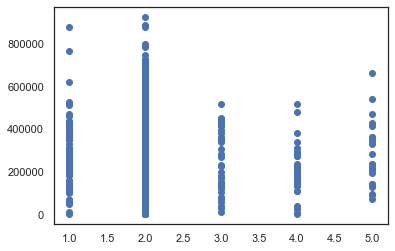

In [337]:
plt.scatter(Big_Street_ATM_Data["Festival Religion"], Big_Street_ATM_Data["Total amount Withdrawn"])

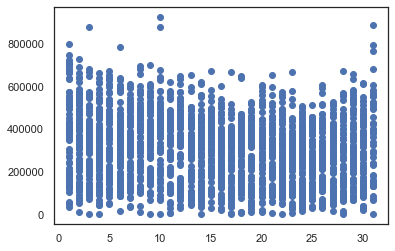

In [338]:
plt.scatter(Big_Street_ATM_Data["T_day"], Big_Street_ATM_Data["Total amount Withdrawn"])

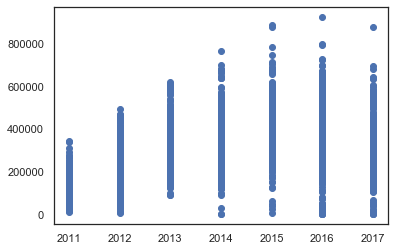

In [339]:
plt.scatter(Big_Street_ATM_Data["T_year"], Big_Street_ATM_Data["Total amount Withdrawn"])

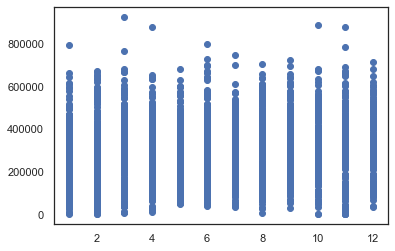

In [340]:
plt.scatter(Big_Street_ATM_Data["T_month"], Big_Street_ATM_Data["Total amount Withdrawn"])

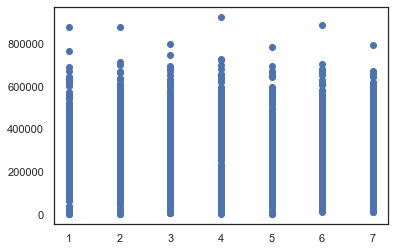

In [341]:
plt.scatter(Big_Street_ATM_Data["Weekday"], Big_Street_ATM_Data["Total amount Withdrawn"])

In [342]:
Big_Street_ATM_Data.head()

,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day
0,123800,6,1,1,1,2011,1,1
5,52800,7,2,1,2,2011,1,2
10,88100,1,2,2,3,2011,1,3
15,101600,2,2,2,3,2011,1,4
20,98000,3,2,2,3,2011,1,5


In [343]:
from scipy.optimize import curve_fit

def func(X, a, b, c, d, e, f, g, h):
    Weekday,Festival,WorkingDay, HolidaySeq, T_year, T_month, T_day = X
    return np.sin(a) + b*np.sin(Weekday) + c*np.sin(Festival) + d*np.sin(WorkingDay) + e*np.sin(HolidaySeq) + f*np.sin(T_year) + g*np.sin(T_month) + h*np.sin(T_day)


z = Big_Street_ATM_Data["Total amount Withdrawn"];

# initial guesses for a,b,c:
p0 = -2367.59040594,   -811.42852447,  20342.42454262, 333710.23478462, 7142.03266749, -99287.35854094,  -8532.01828833,   8293.52577445
c, cov = curve_fit(func, (Big_Street_ATM_Data["Weekday"],Big_Street_ATM_Data["Festival Religion"],Big_Street_ATM_Data["Working Day"],Big_Street_ATM_Data["Holiday Sequence"],Big_Street_ATM_Data["T_year"],Big_Street_ATM_Data["T_month"],Big_Street_ATM_Data["T_day"]), z, p0)
c

array([ -2321.97057956,   -812.19716848,  20333.27836256, 333713.66098478,
         7140.77584945, -99287.577712  ,  -8532.1706592 ,   8293.45693974])

In [344]:
#set values predicted 
count =  len(Big_Street_ATM_Data["Total amount Withdrawn"])
p0 = -2321.97057956,   -812.19716848,  20333.27836256, 333713.66098478, 7140.77584945, -99287.577712  ,  -8532.1706592 ,   8293.45693974
predicted = np.empty(count)
for i in range (count):
    predicted[i] = func(((Big_Street_ATM_Data["Weekday"].values)[i],(Big_Street_ATM_Data["Festival Religion"].values)[i],(Big_Street_ATM_Data["Working Day"].values)[i],(Big_Street_ATM_Data["Holiday Sequence"].values)[i],(Big_Street_ATM_Data["T_year"].values)[i],(Big_Street_ATM_Data["T_month"].values)[i],(Big_Street_ATM_Data["T_day"].values)[i]), p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], p0[6],  p0[7])

In [345]:
from sklearn.metrics import r2_score
r2_score( Big_Street_ATM_Data["Total amount Withdrawn"],  predicted)

0.2074349170481964

In [346]:
# for testing 
Big_Street_ATM_Data.loc[Big_Street_ATM_Data.where( (Big_Street_ATM_Data["Weekday"] == 1) &  (Big_Street_ATM_Data["Festival Religion"] == 1)  &  (Big_Street_ATM_Data["Working Day"] == 1)  &  (Big_Street_ATM_Data["Holiday Sequence"] == 1) &  (Big_Street_ATM_Data["T_year"] == 2012) &  (Big_Street_ATM_Data["T_month"] == 1) &  (Big_Street_ATM_Data["T_day"] == 1))["Total amount Withdrawn"].notnull()]

,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence,T_year,T_month,T_day


In [347]:
# https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
Big_Street_ATM_Data["Total amount Withdrawn Modified"] =  Big_Street_ATM_Data["Total amount Withdrawn"] / 100000
Big_Street_ATM_Data["Total amount Withdrawn Modified"] = Big_Street_ATM_Data["Total amount Withdrawn Modified"].apply(lambda x :  math.ceil(x))
Big_Street_ATM_Data["T_year_Modified"] =Big_Street_ATM_Data["T_year"] - 2010
Big_Street_ATM_Data["T_day_Half"] = Big_Street_ATM_Data["T_day"].apply(lambda x : 1 if x<11 else (2 if x<21 else (3 if x<32 else 4)) )

In [375]:
from sklearn.preprocessing import PolynomialFeatures 
X = np.concatenate((Big_Street_ATM_Data["T_year_Modified"].values.reshape(-1,1), Big_Street_ATM_Data["Working Day"].values.reshape(-1,1),Big_Street_ATM_Data["Holiday Sequence"].values.reshape(-1,1),Big_Street_ATM_Data["T_month"].values.reshape(-1,1),Big_Street_ATM_Data["T_day"].values.reshape(-1,1)),axis=1)

y = Big_Street_ATM_Data["Total amount Withdrawn Modified"] 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y) 

X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2)

lin = Ridge() 

lin.fit(X_train, Y_train)

score=lin.score(X_test,Y_test)
print('coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)
print('R^2: ', score)

coefficients:  [  1335.1845896  -12873.12730574  26155.55359218    663.23903973
  43445.77159459   7209.82819163  -2787.76456284]
Intercept:  -87207283.1498152
R^2:  0.46540952998100504


In [376]:
# plt.scatter(X, y, color = 'blue') 
  
plt.plot(X_train, predict(X_train), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

ValueError: too many values to unpack (expected 8)

In [371]:
def predict(Data):
    a , b , c, d, e, f, g, h = Data
    return  -87207283.1498152 + 1335.1845896*a  - 12873.12730574*b^2 + 26155.55359218*c^3 + 663.23903973*d^4 + 43445.77159459*e^5 + 7209.82819163*f^6 - 2787.76456284*g^7

In [373]:
X

array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  2],
       [ 1,  2,  3,  1,  3],
       ...,
       [ 7,  2,  3,  9, 27],
       [ 7,  2,  5,  9, 28],
       [ 7,  1,  1,  9, 29]], dtype=int64)